<a href="https://colab.research.google.com/github/jaskiratsingh562/Brain_tumor_detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Setting up kaggle and importing Dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/"Colab Notebooks"/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ahmedhamada0/brain-tumor-detection

 89% 75.0M/84.0M [00:00<00:00, 106MB/s] 
100% 84.0M/84.0M [00:00<00:00, 92.0MB/s]


In [ ]:
!unzip /content/brain-tumor-detection.zip

Archive:  /content/brain-tumor-detection.zip
  inflating: Br35H-Mask-RCNN/TEST/annotations_test.json  
  inflating: Br35H-Mask-RCNN/TEST/y701.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y702.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y703.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y704.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y705.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y706.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y707.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y708.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y709.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y710.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y711.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y712.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y713.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y714.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y715.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y716.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y717.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y718.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y719.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y720.jpg

In [ ]:
root_dir = "/content"
dest = os.path.join(root_dir,'Brain_tumor_classification')
for folder in ['no','yes']:
  src = os.path.join(root_dir,folder)
  final = os.path.join(dest,folder)
  shutil.copytree(src,final)


In [ ]:
parent_directory = "/content/Brain_tumor_classification"

for split_path in ['train','test','val']:
  dest_path = os.path.join(parent_directory,split_path)
  if not os.path.exists(dest_path):
    os.mkdir(dest_path)


for class_name in ["no","yes"]:

  train_files =[]
  test_files = []
  val_files = []

  org_path = os.path.join(parent_directory,class_name)
  files = os.listdir(org_path)
  random.shuffle(files)

  for i in range(len(files)):
    if i < int(0.7 * len(files)):
      train_files.append(files[i])
    elif i < int(0.85 * len(files)):
      test_files.append(files[i])
    else:
      val_files.append(files[i])


  for filelist in [train_files,test_files,val_files]:

    if filelist == train_files:
      dest_path = os.path.join(parent_directory,'train',class_name)
    elif filelist == test_files:
      dest_path = os.path.join(parent_directory,'test',class_name)
    else:
      dest_path = os.path.join(parent_directory,'val',class_name) 
    if not os.path.exists(dest_path):
      os.mkdir(dest_path)
    for file in filelist:
      filesrc = os.path.join(org_path,file)
      filedst = os.path.join(dest_path,file)
      shutil.copyfile(filesrc,filedst)
    

# Data Analysis

In [ ]:
import cv2
import matplotlib.pyplot as plt

train_folder = "/content/Brain_tumor_classification/train"

num_images = 10

class_labels = ["no","yes"]

for label in class_labels:
  class_folder = os.path.join(train_folder,label)
  image_files = os.listdir(class_folder)[:num_images]

  for image_file in image_files:
    image_path = os.path.join(class_folder,image_file)
    image = cv2.imread(image_path)
    print(image.shape)

(630, 630, 3)
(512, 512, 3)
(225, 225, 3)
(221, 228, 3)
(680, 680, 3)
(380, 336, 3)
(225, 225, 3)
(259, 194, 3)
(474, 356, 3)
(201, 173, 3)
(318, 273, 3)
(1280, 1061, 3)
(303, 223, 3)
(225, 225, 3)
(295, 283, 3)
(210, 200, 3)
(323, 276, 3)
(307, 271, 3)
(277, 272, 3)
(251, 204, 3)


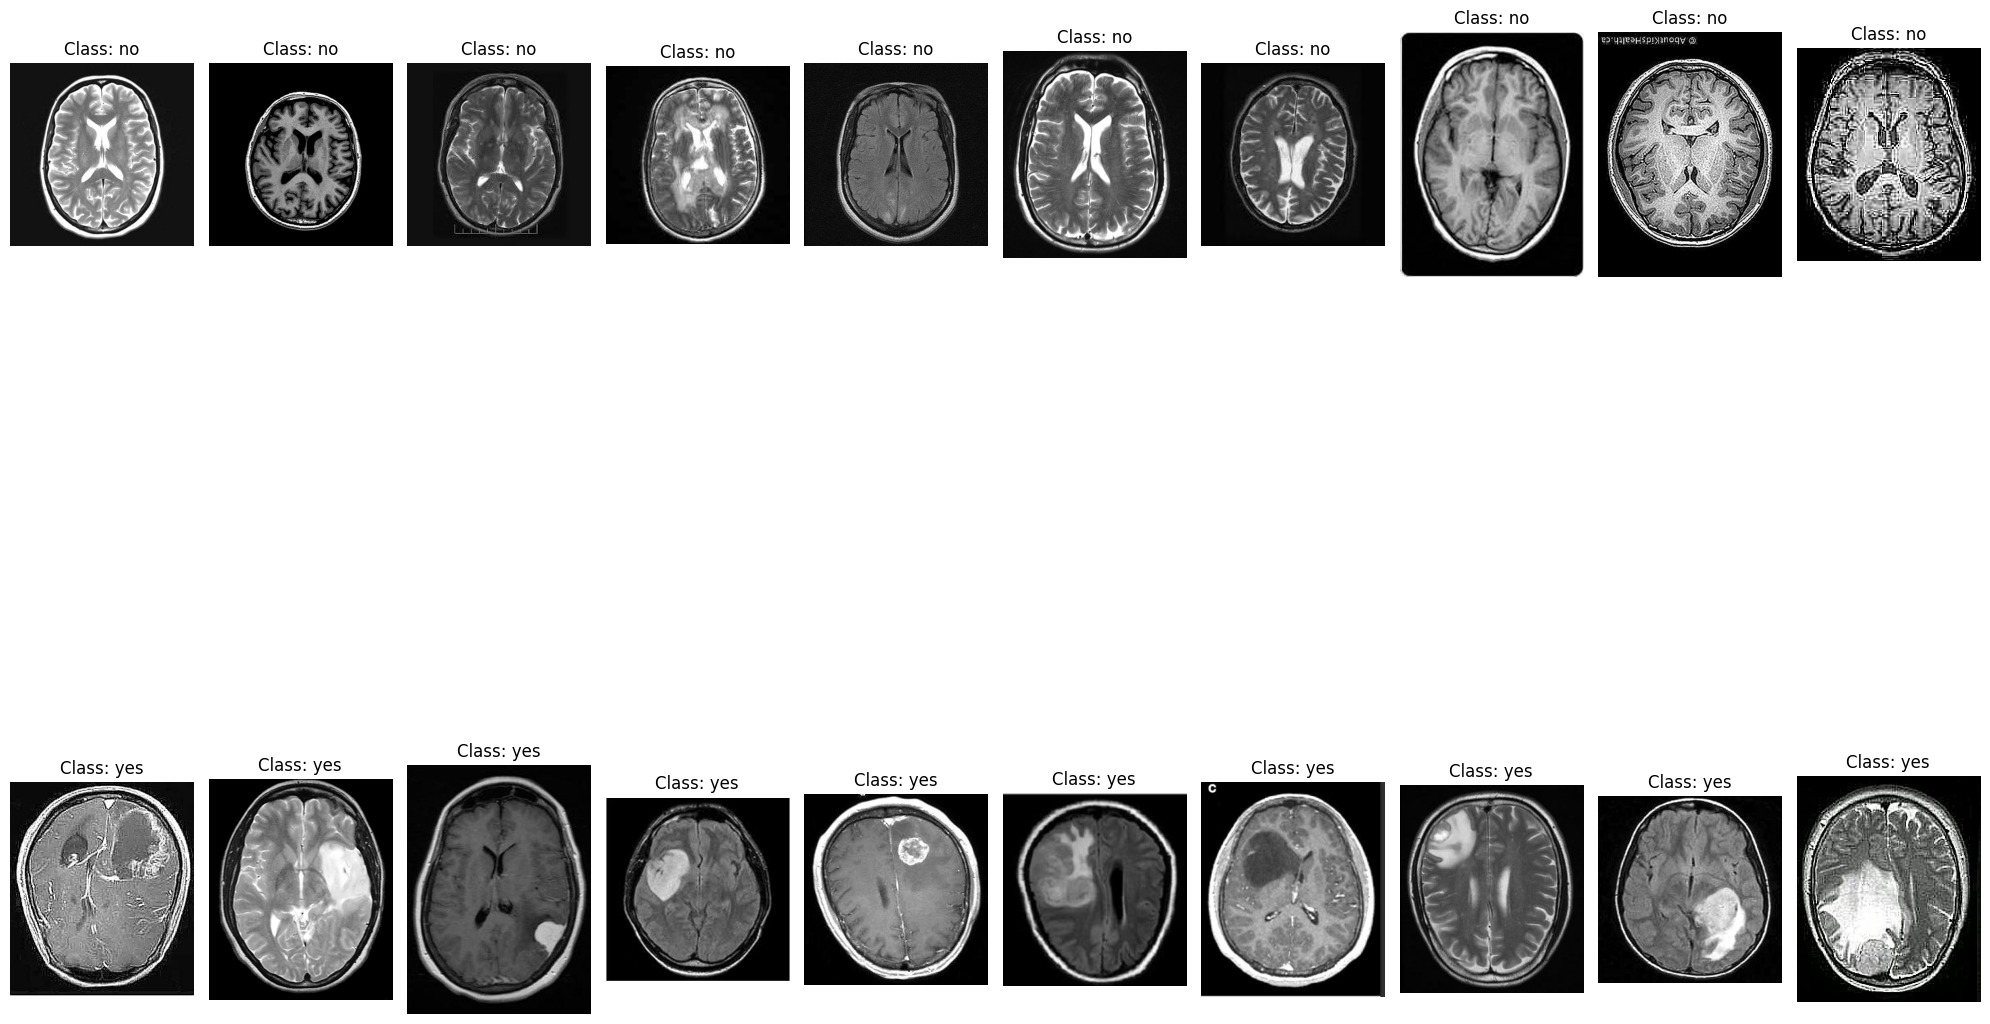

In [30]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows=2, ncols=10, figsize=(20,20))
train_folder = "/content/Brain_tumor_classification/train"

num_images = 10
class_labels = ["no","yes"]
index=1
for label in class_labels:
  class_folder = os.path.join(train_folder,label)
  image_files = os.listdir(class_folder)[:num_images]

  for image_file in image_files:
    image_path = os.path.join(class_folder,image_file)
    image = plt.imread(image_path)
    plt.subplot(2,10,index)
    index+=1
    plt.imshow(image,cmap='Greys')
    plt.title(f"Class: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Model Implementation


In [31]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters=36, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))

model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [32]:
model.compile(optimizer='Adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

# Preprocessing data

In [33]:
def preprocessing1(path):
  #input : path
  #output = preprocessed image

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image


In [34]:
def preprocessing2(path):
  #input : path
  #output = preprocessed image

  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [35]:
path = "/content/Brain_tumor_classification/train"
train_data = preprocessing1(path)

Found 2100 images belonging to 2 classes.


In [36]:
path = "/content/Brain_tumor_classification/val"
val_data = preprocessing2(path)

Found 450 images belonging to 2 classes.


In [37]:
path = "/content/Brain_tumor_classification/test"
test_data = preprocessing2(path)

Found 450 images belonging to 2 classes.


# Early Stopping


In [38]:
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience =3,verbose=1,mode='auto')

mc = ModelCheckpoint(monitor='val_accuracy', filepath='./bestmode.h5', verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]

#Train the model

In [39]:
total_train_samples = len(train_data.filenames)
total_val_samples = len(val_data.filenames)
batch_size = train_data.batch_size
epochs = 30

steps_per_epoch = total_train_samples // batch_size
validation_steps = total_val_samples // batch_size

history = model.fit(train_data, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, epochs=epochs, verbose=1, validation_data=val_data)



Epoch 1/30
65/65 [==============================] - 49s 510ms/step - loss: 0.6197 - accuracy: 0.6726 - val_loss: 0.4384 - val_accuracy: 0.7634
Epoch 2/30
65/65 [==============================] - 31s 472ms/step - loss: 0.4947 - accuracy: 0.7834 - val_loss: 0.3734 - val_accuracy: 0.8460
Epoch 3/30
65/65 [==============================] - 31s 478ms/step - loss: 0.4378 - accuracy: 0.8037 - val_loss: 0.4630 - val_accuracy: 0.7857
Epoch 4/30
65/65 [==============================] - 31s 477ms/step - loss: 0.4050 - accuracy: 0.8230 - val_loss: 0.3203 - val_accuracy: 0.8661
Epoch 5/30
65/65 [==============================] - 32s 498ms/step - loss: 0.3651 - accuracy: 0.8588 - val_loss: 0.3375 - val_accuracy: 0.8638
Epoch 6/30
65/65 [==============================] - 31s 480ms/step - loss: 0.3427 - accuracy: 0.8627 - val_loss: 0.2809 - val_accuracy: 0.8884
Epoch 7/30
65/65 [==============================] - 30s 463ms/step - loss: 0.3130 - accuracy: 0.8704 - val_loss: 0.2665 - val_accuracy: 0.8862

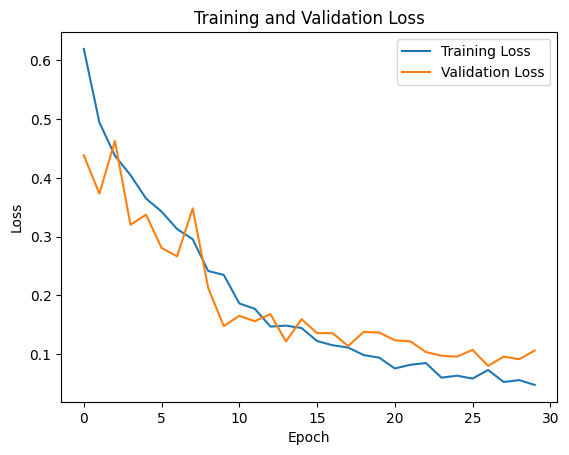

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

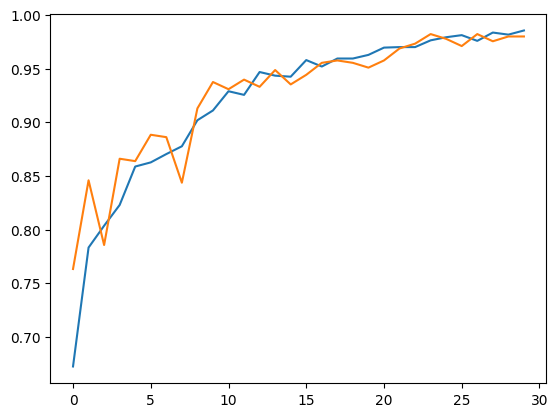

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [42]:
model.save("model.h5")

In [43]:

test_loss, test_accuracy = model.evaluate(test_data)

15/15 [==============================] - 2s 109ms/step - loss: 0.1109 - accuracy: 0.9756
